# **02. Neural Network Classification With PyTorch**

## 1. Make Classification Dataset and get it ready


In [24]:
from sklearn.datasets import make_circles
import pandas as pd

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    factor=0.5,
                    random_state=42)

In [25]:
print(f"The 5 samples of X are:\n{X[:5]}\n")
print(f"The 5 samples of y are:\n{y[:5]}\n")
print(f"The shape of X is: {X.shape}\n")
print(f"The shape of y is: {y.shape}\n")

The 5 samples of X are:
[[ 0.46463176  0.15322829]
 [-0.4601531   0.10446773]
 [-0.51775752  0.13568206]
 [-0.26599694  0.42143465]
 [ 0.44220765 -0.89672343]]

The 5 samples of y are:
[1 1 1 1 0]

The shape of X is: (1000, 2)

The shape of y is: (1000,)



In [26]:
# Make a DataFrame of circle Data
circles = pd.DataFrame({"X1" : X[:, 0],
                       "X2": X[:, 1],
                       "label": y})

# Check the result
circles.head(10)


,X1,X2,label
0,0.464632,0.153228,1
1,-0.460153,0.104468,1
2,-0.517758,0.135682,1
3,-0.265997,0.421435,1
4,0.442208,-0.896723,0
5,-0.294288,0.440548,1
6,-0.009879,0.503372,1
7,0.475507,0.098968,1
8,-0.109409,-0.499499,1
9,-0.121486,1.021509,0


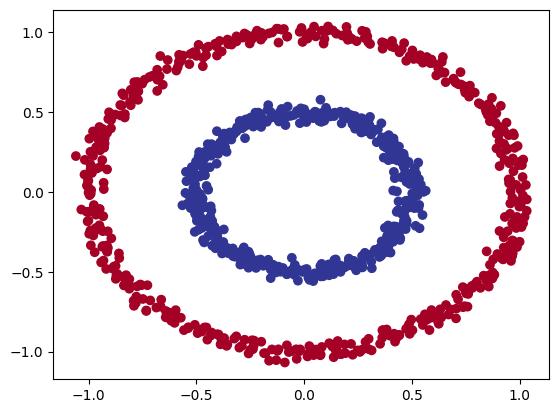

In [27]:
# Visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(x = X[:, 0], 
            y = X[:, 1], 
            c=y,
            cmap=plt.cm.RdYlBu)

Note: the data we are working with is often referenced as  a toy dataset, a dataset that is small enough to experiment with but still sizeable enough to apply machine learning techniques to.

### 1.1 **Check Input and Output Shapes**

In [28]:
print(f"The type of X is: {type(X)}\n")
print(f"The type of y is: {type(y)}\n")
print(f"The type of circles is: {type(circles)}\n")

The type of X is: <class 'numpy.ndarray'>

The type of y is: <class 'numpy.ndarray'>

The type of circles is: <class 'pandas.core.frame.DataFrame'>



In [29]:
# View the first example of featuews and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.46463176 0.15322829] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### 1.2 **Turn data into tensors and create train/test split**

In [30]:
import torch
torch.__version__

'2.6.0+cpu'

In [31]:
### Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
# Split data
X[:5], y[:5]

(tensor([[ 0.4646,  0.1532],
         [-0.4602,  0.1045],
         [-0.5178,  0.1357],
         [-0.2660,  0.4214],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [32]:
# Spit data into train and test sets
print(f"type of X: {type(X)}\n")
print(f"type of y: {type(y)}\n")
print(f"shape of X: {X.shape}", f"shape of y: {y.shape}\n")


type of X: <class 'torch.Tensor'>

type of y: <class 'torch.Tensor'>

shape of X: torch.Size([1000, 2]) shape of y: torch.Size([1000])



In [33]:
torch.manual_seed(42)

In [34]:
from sklearn.model_selection import train_test_split
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, #0.2 means 20% test, 80% train
                                                    random_state=42)
print(f"X_train shape: {X_train.shape}\n")
print(f"X_test shape: {X_test.shape}\n")
print(f"y_train shape: {y_train.shape}\n")
print(f"y_test shape: {y_test.shape}\n")


X_train shape: torch.Size([800, 2])

X_test shape: torch.Size([200, 2])

y_train shape: torch.Size([800])

y_test shape: torch.Size([200])



## 2. Buiding a model
Let's build a model to classify our blue and red dots.

To Do so, we want to:
1. Setup device agnostic code (so our model can run on CPU or GPU if it's available).
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop


In [35]:
# Import PyTorch and nn
import torch
import torch.nn as nn

# Make a device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device\n")

Using cpu device



In [36]:
X_train

tensor([[ 0.4221, -0.2797],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.3497, -0.3548]])

Now we've setup device agnostic code, let's create a model that:  

1. Subclasses nn.Module (almost all PyTorch models are subclasses of nn.Module)
2. Create 2 nn.Linear layers in the __init__() method (these will be our features (X) and output (y))
3. Defines a forward() method that outlines the forward pass (or forward computation) of the model
4. Instantiates the model class and sends it to the target device


In [37]:
# 1. construct a model that subclass nn.Module
class CircleModel(nn.Module):
    def __init__(self, input_features, output_features):
        super().__init__()
        self.layer1 = nn.Linear(in_features=input_features, #input_features=2
                                out_features=output_features #output_features=5
                                )
        # 2. add a second layer to the model
        self.layer2 = nn.Linear(in_features=output_features, #input_features=5
                                out_features=1 #output_features=1
                                )
        # 3. add an activation function to the model
        self.activation = nn.Sigmoid()
    
    def forward(self, x):
        return self.activation(
            self.layer2(         
                self.layer1(x) #    x -> layer1 -> layer2 -> activation function
                ))
        
# 4. create an instance of the model and send it to the device
model = CircleModel(input_features=2, #input_features=2
                    output_features=5) #output_features=5
model.to(device) #send the model to the device
print(f"Model : {model}\n") #view the model
print(f"State Dicts : {model.state_dict()}\n")#view the model's state dict

Model : CircleModel(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
  (activation): Sigmoid()
)

State Dicts : OrderedDict([('layer1.weight', tensor([[ 0.5406,  0.5869],
        [-0.1657,  0.6496],
        [-0.1549,  0.1427],
        [-0.3443,  0.4153],
        [ 0.6233, -0.5188]])), ('layer1.bias', tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410])), ('layer2.weight', tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]])), ('layer2.bias', tensor([-0.2060]))])



In [40]:
# Make predictions with the model
untrained_preds = model(X_test.to(device)) #send the test data to the device
# View the first 10 predictions
untrained_preds[:10]

print(f"Untrained model predictions: {untrained_preds[:10]}\n")
print(f"Length of untrained model predictions: {len(untrained_preds)}\n")
print(f"length of test samples: {len(X_test)},Shape of test samples: {X_test.shape}\n")
print(f"First 10 predictions    :\n{untrained_preds[:10]}")
print(f"First 10 Labels :\n{X_test[:10]}")


Untrained model predictions: tensor([[0.4666],
        [0.4758],
        [0.4568],
        [0.4728],
        [0.4599],
        [0.4630],
        [0.4794],
        [0.4764],
        [0.4562],
        [0.4764]], grad_fn=<SliceBackward0>)

Length of untrained model predictions: 200

length of test samples: 200,Shape of test samples: torch.Size([200, 2])

First 10 predictions    :
tensor([[0.4666],
        [0.4758],
        [0.4568],
        [0.4728],
        [0.4599],
        [0.4630],
        [0.4794],
        [0.4764],
        [0.4562],
        [0.4764]], grad_fn=<SliceBackward0>)
First 10 Labels :
tensor([[-0.2274,  0.4216],
        [ 0.0154,  0.9600],
        [-0.4298, -0.1904],
        [-0.2853,  0.9664],
        [ 0.2417, -0.4905],
        [ 0.4011, -0.3799],
        [ 0.8561,  0.5499],
        [ 1.0034,  0.1903],
        [-0.4603, -0.2132],
        [ 0.0538,  0.9739]])


### 2.1 Setup loss function and optimizer

which loss function and optimizer to use?

Again this is problem specific.

For example, for regression, you might want MAE or MSE (mean absolute error or mean squared error).

For classification, you might want binary cross entropy or categorical cross entropy.  